In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE=42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

print(X_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 1)


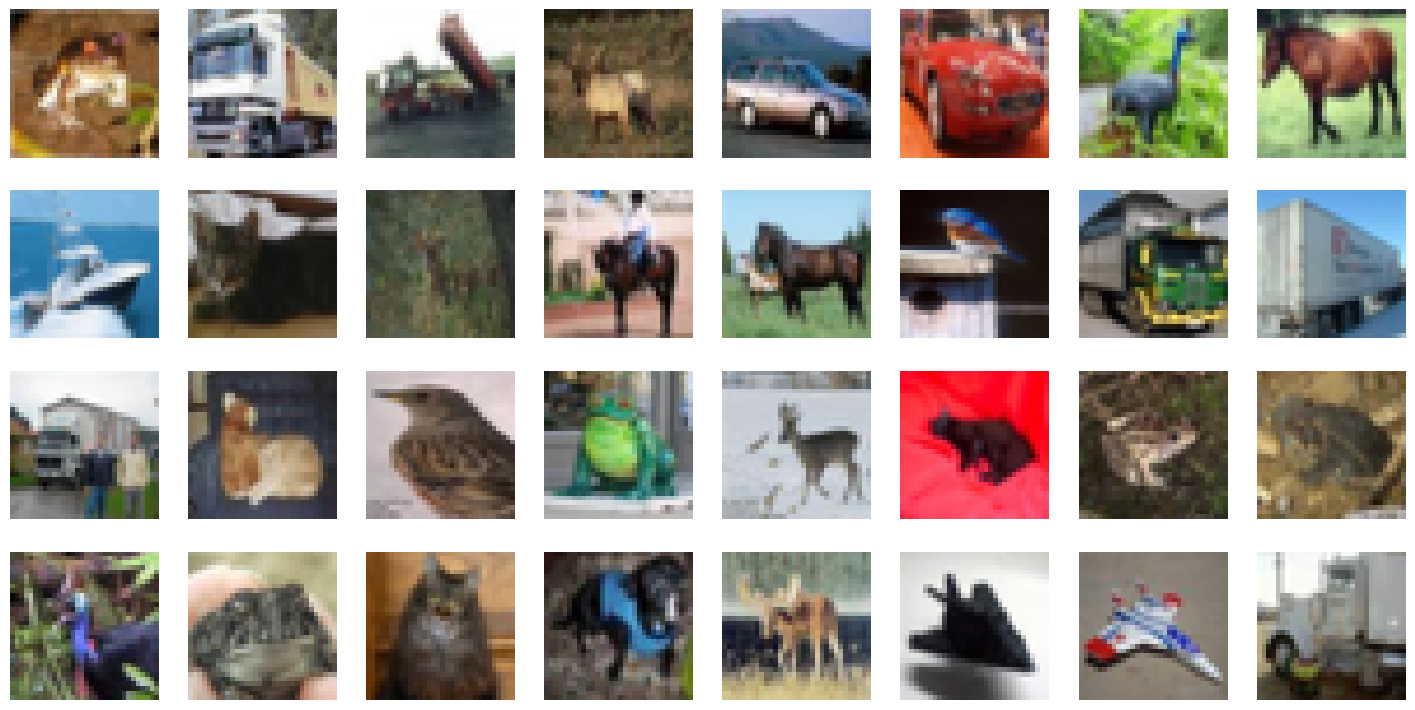

In [4]:
plt.figure(figsize=(18,9))
num_rows=4
num_cols=8

for i in range(num_rows*num_cols):
    ax=plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

In [5]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255
print('Original(integer) label for the first training sample:',y_train[0])
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print('After conversion to categorical one-hot encoded labels:',y_train[0])

Original(integer) label for the first training sample: [6]
After conversion to categorical one-hot encoded labels: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int=5
    IMG_HEIGHT: int=32
    IMG_WIDTH: int=32
    NUM_CHANNELS: int=3
    
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int=5
    BATCH_SIZE: int=256
    LEARNING_RATE: float=0.001
    
                

In [7]:
def cnn_model(input_shape=(32,32,3)):
    model=Sequential()
    
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    return model

In [8]:
model=cnn_model()
model.summary()

C:\Users\tupka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,922 (1.20 MB)

 Trainable params: 314,922 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [10]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.1883 - loss: 2.2059 - val_accuracy: 0.3441 - val_loss: 1.9102
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.3532 - loss: 1.7779 - val_accuracy: 0.3487 - val_loss: 1.7988
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.4231 - loss: 1.5787 - val_accuracy: 0.4412 - val_loss: 1.5154
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.4857 - loss: 1.4255 - val_accuracy: 0.5019 - val_loss: 1.3565
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5318 - loss: 1.3007 - val_accuracy: 0.5306 - val_loss: 1.3028


In [11]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

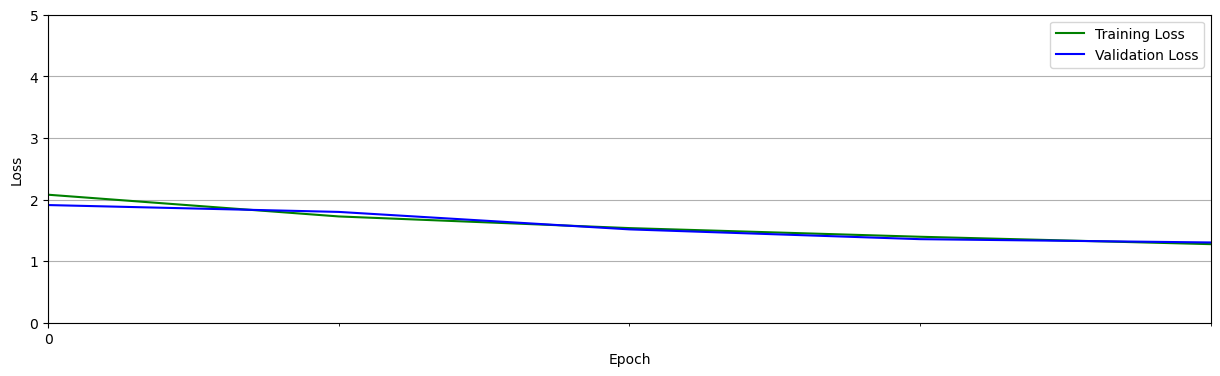

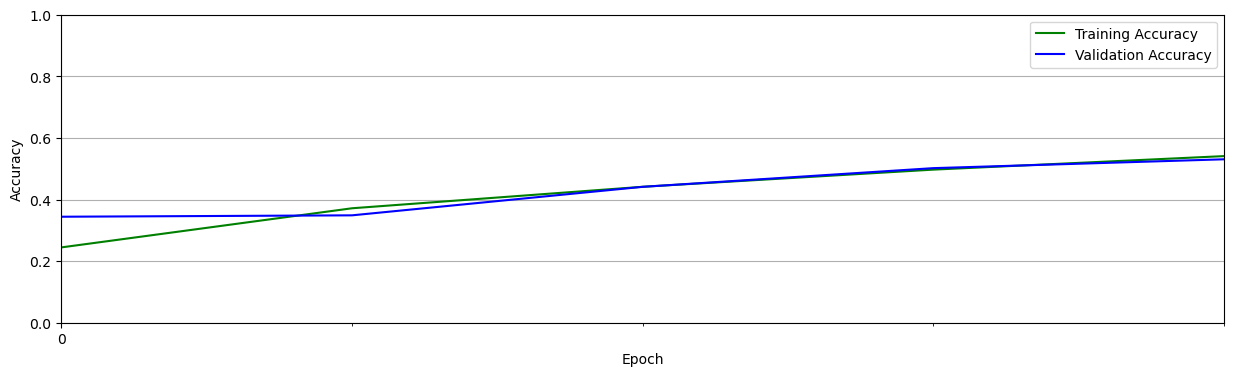

In [12]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [13]:
def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()


    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model


In [14]:
model_dropout=cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_dropout.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'],
                     )

In [16]:

history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.1582 - loss: 2.2350 - val_accuracy: 0.2159 - val_loss: 2.2083
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.3206 - loss: 1.8681 - val_accuracy: 0.3558 - val_loss: 1.7794
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.3987 - loss: 1.6439 - val_accuracy: 0.4426 - val_loss: 1.5592
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.4579 - loss: 1.4917 - val_accuracy: 0.3695 - val_loss: 1.8261
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.4982 - loss: 1.3933 - val_accuracy: 0.4522 - val_loss: 1.6445


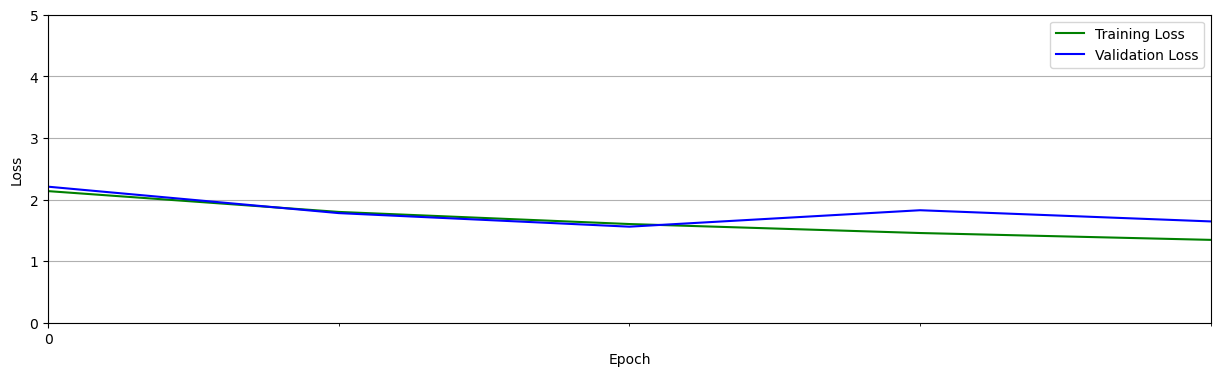

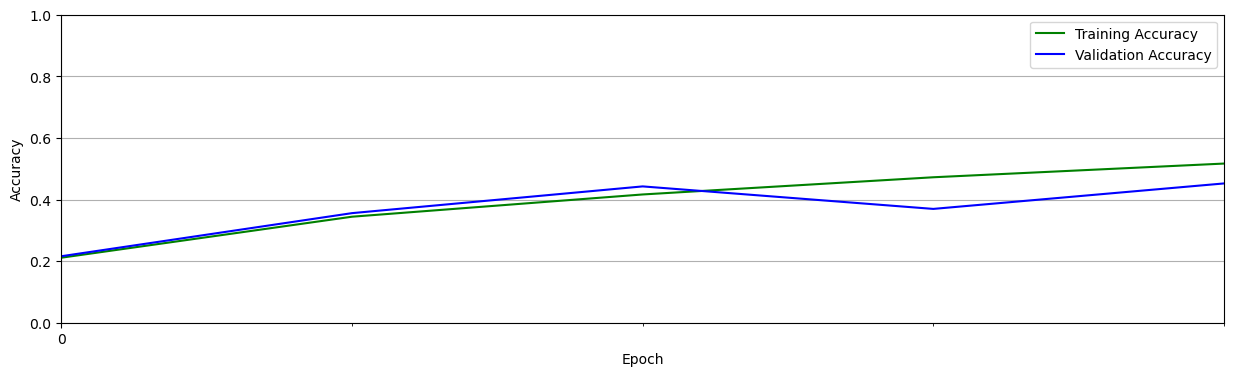

In [18]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [19]:
model_dropout.save('model_dropout.keras')

In [20]:
from tensorflow.keras import models
reloaded_model_dropout=models.load_model('model_dropout.keras')

In [21]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test,y_test)
print(f"Test accuracy:{test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4449 - loss: 1.6470
Test accuracy:44.500


In [22]:
def evaluate_model(dataset, model):
    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6

    data_batch = dataset[0:num_rows*num_cols]

    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

In [23]:
evaluate_model=(X_test, reloaded_model_dropout)

In [24]:
predictions=reloaded_model_dropout.predict(X_test)

predicted_labels=[np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


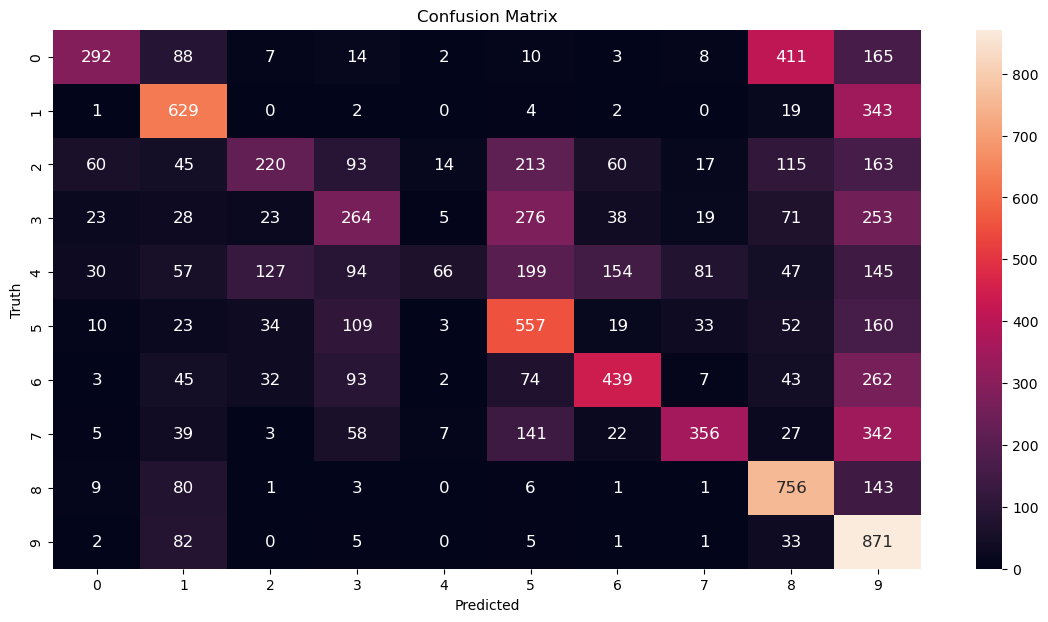

In [25]:
y_test_integer_labels=tf.argmax(y_test,axis=1)

cm=tf.math.confusion_matrix(labels=y_test_integer_labels,predictions=predicted_labels)

import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True,fmt='d',annot_kws={"size":12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()